<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/hf_utilisation_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
import transformers

 * page : https://huggingface.co/course/fr/chapter2/4?fw=tf
 * url : 
   * overview : https://www.youtube.com/watch?v=VFp38yj8h3A&ab_channel=HuggingFace
   * word based : https://www.youtube.com/watch?v=nhJxYji1aho&ab_channel=HuggingFace
   * character based : https://www.youtube.com/watch?v=ssLq_EK2jLE&ab_channel=HuggingFace
   * subword based : https://www.youtube.com/watch?v=zHvTiHr506c&ab_channel=HuggingFace
   * tokenization pipeline : https://www.youtube.com/watch?v=Yffk5aydLzg&ab_channel=HuggingFace

### Word Based Tokenizer

C'est le plus naïf, il voit chaque mot comme un token. Ca donne des résultats relativement mauvais car le tokenizer créera une représentation complètement différentes de *chien* et *chiens*. Il existe des tokenizers word based plus ou moins fin quant à la gestion de la ponctuation. A remarquer qu'il existe un token appelé UNK qui sera la représentation de tout les mots qui ne figueront pas dans le vocabulaire.

### Character Based Tokenizer
 * Avantages : 
   * Vocabulaire restreint
   * Très peu de unknown tokens
   * Pour certaines langues comme le chinois dans laquelle chaque caractère est un mot, cela est particulièrement approprié
 * Défauts :
   * Perte de sens, chaque caractère ne possède pas de sens particulier
   * très grand nombre de tokens a traiter

### Subword Based Tokenizer
Le tokenizer exploite l'idée selon laquelle les mots peuvent être splittés en subwords. L'intérêt est triple :  
 * Diminution du vocabulaire
 * Diminution du nombre de token UNK
 * Bonne appréciation des mots grâce aux suffixes et préfixes. Par exemple *maisonette* sera décomposé en deux tokens *maison* + *ette*

Cette forme de tokenization est particulierement utile dans les langues dites *agglutinantes* comme l'hébreu ou le turc


# Chargement et Sauvegarde de Tokenizer

Un tokenizer est dans l'écosysteme de HuggingFace un peu comme un modèle. On peut le charger, le sauvegarder. Il possède un algorithme semblable à l'architecture d'un modèle et un vocabulaire semblable aux poids d'un modèle. Ainsi, le chargement et la sauvegarde d'un modèle s'effectuent en utilisant les mêmes méthodes que pour les modèles.

```python
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

# Similairement aux modèles, on peut soit utiliser la méthode agnostique ou bien la méthode spécifique


tokenizer.save_pretrained("directory_on_my_computer")
# Similaire au modèle
```

## Les opérations sous le boisseau d'un tokenizer

Un tokenizer dispose de plusieurs opérations :
 * La création des strings tokenized avec la méthode `.tokenize()`
 * Le mapping des strings tokenized vers des entiers IDs via la méthode `convert_tokens_to_ids.()`
 * Le reverse mapping, des entiers vers les strings tokenized, particulièrement utile lors du postprocessing, via `decode.()`


#### Création des strings tokenized


```python
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)
```

```python
['Using', 'a', 'transform', '##er', 'network', 'is', 'simple']
```

#### Le Mapping des strings vers les entiers

```python
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)
```

```python
[7993, 170, 11303, 1200, 2443, 1110, 3014]
```

#### Le Reverse Mapping des entiers vers une phrase

```python
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)
```

```python
'Using a Transformer network is simple'
```

### Les différentes étapes lors de la tokenization

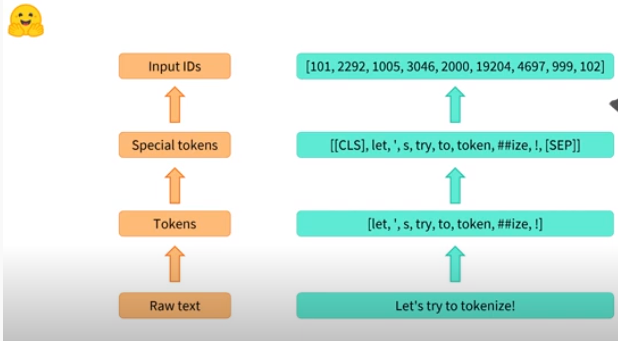
